In [35]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import sklearn

In [36]:
d_train = pd.read_csv("/home/sagar24/enigma/enigma_day1/train.csv")
d_test = pd.read_csv("/home/sagar24/enigma/enigma_day1/test.csv")
print(d_test.dtypes)

Number of soldiers     int64
Number of tanks        int64
Number of aircrafts    int64
Id                     int64
dtype: object


In [37]:
y1=d_train["Victory Status"]
y = np.asarray(y1)
y=y.reshape(-1,1)

d_train.drop(["Victory Status"], axis = 1, inplace = True)
d_train.drop(["Id"], axis = 1, inplace = True)
#nd = (d_train - d_train.mean()) / d_train.std()


x = np.asarray(d_train,dtype=np.float64)
#print(x)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


id1=d_test["Id"]
d_test.drop(["Id"], axis = 1, inplace = True)
#nd = (d_train - d_train.mean()) / d_train.std()
x2 = np.asarray(d_test,dtype=np.float64)
#print(x)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2 = sc.fit_transform(x2)


print(x2)

[[-1.79819804 -0.33419478 -0.10713888]
 [-1.44970219 -1.223084   -0.5920833 ]
 [-1.44970219  0.85099084  0.86274995]
 [-1.44970219 -1.51938041  4.25736085]
 [-1.44970219 -0.63049119  1.02439809]
 [-1.36257823  0.25839803  1.5093425 ]
 [-1.36257823 -0.03789838 -0.5920833 ]
 [-1.27545427 -0.9267876  -0.43043516]
 [-1.18833031 -1.51938041 -0.5920833 ]
 [-1.18833031 -0.03789838 -0.5920833 ]
 [-1.10120635  1.73988006  2.80252761]
 [-1.10120635 -1.223084   -0.26878702]
 [-1.10120635 -0.9267876  -0.5920833 ]
 [-1.10120635  0.25839803 -0.43043516]
 [-1.10120635 -0.9267876  -0.43043516]
 [-1.01408239 -0.03789838 -0.5920833 ]
 [-1.01408239  1.14728725 -0.5920833 ]
 [-0.92695843 -1.51938041 -0.5920833 ]
 [-0.83983446 -1.223084    0.70110181]
 [-0.83983446  1.73988006  0.70110181]
 [-0.83983446  0.55469443 -0.5920833 ]
 [-0.7527105  -1.223084   -0.5920833 ]
 [-0.7527105  -0.63049119  0.05450926]
 [-0.7527105   0.55469443 -0.5920833 ]
 [-0.7527105  -0.03789838 -0.43043516]
 [-0.66558654 -0.03789838

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

/home/sagar24/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


('Accuracy:', 3, '  ', 0.6818181818181818)
('Accuracy:', 4, '  ', 0.6818181818181818)
('Accuracy:', 5, '  ', 0.7045454545454546)
('Accuracy:', 6, '  ', 0.7727272727272727)
('Accuracy:', 7, '  ', 0.7727272727272727)
('Accuracy:', 8, '  ', 0.8181818181818182)
('Accuracy:', 9, '  ', 0.75)
('Accuracy:', 10, '  ', 0.7727272727272727)
('Accuracy:', 11, '  ', 0.7727272727272727)
('Accuracy:', 12, '  ', 0.7272727272727273)
('Accuracy:', 13, '  ', 0.75)
('Accuracy:', 14, '  ', 0.7045454545454546)
('Accuracy:', 15, '  ', 0.75)
('Accuracy:', 16, '  ', 0.7954545454545454)
('Accuracy:', 17, '  ', 0.7954545454545454)
('Accuracy:', 18, '  ', 0.7954545454545454)
('Accuracy:', 19, '  ', 0.7954545454545454)
('Accuracy:', 20, '  ', 0.7954545454545454)
('Accuracy:', 21, '  ', 0.7954545454545454)
('Accuracy:', 22, '  ', 0.7727272727272727)
('Accuracy:', 23, '  ', 0.7727272727272727)
('Accuracy:', 24, '  ', 0.7727272727272727)
('Accuracy:', 25, '  ', 0.7954545454545454)
('Accuracy:', 26, '  ', 0.79545454545

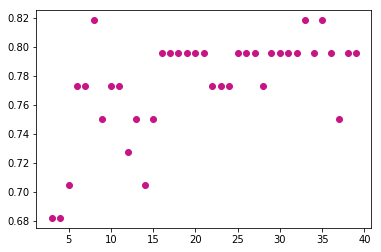

33


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
accuracy=0
n=3
for i in range (3,40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    y_pred1 = classifier.predict(x_test)
    print("Accuracy:",i,"  ",metrics.accuracy_score(y_test,y_pred1))
    if i%2!=0:
        if metrics.accuracy_score(y_test,y_pred1)>accuracy:
            accuracy=metrics.accuracy_score(y_test,y_pred1)
            n=i
    plt.plot(i,metrics.accuracy_score(y_test,y_pred1),marker='o', color='mediumvioletred')
plt.show()
print(n)


In [40]:
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(x, y)

y_pred2 = classifier.predict(x2)
print(y_pred2.size)

86


/home/sagar24/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [41]:

df = pd.DataFrame({"category" : y_pred2,"id" : id1})
df.to_csv("submission2.csv", index=False)

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x, y)
y_pred3=clf.predict(x2)
#print(y_pred3-y_pred2)
print(y_pred2)
df3 = pd.DataFrame({"category" : y_pred3,"id" : id1})
df3.to_csv("submission3.csv", index=False)

[1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1]


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x, y)
y_pred4=rf.predict(x2)
#print(y_pred4-y_pred3)
df4 = pd.DataFrame({"category" : y_pred4,"id" : id1})
df4.to_csv("submission4.csv", index=False)

/home/sagar24/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x,y)
y_pred5=nb.predict(x2)
#print(y_pred5-y_pred3)
df5 = pd.DataFrame({"category" : y_pred5,"id" : id1})
df5.to_csv("submission5.csv", index=False)

In [45]:
from sklearn import svm
clf3=svm.SVC()
clf3.fit(x, y)
y_pred6 = clf3.predict(x2)
df6 = pd.DataFrame({"category" : y_pred6,"id" : id1})
df6.to_csv("submission6.csv", index=False)

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x,y)
y_pred7 = dt.predict(x2)
df7 = pd.DataFrame({"category" : y_pred7,"id" : id1})
df7.to_csv("submission7.csv", index=False)

In [47]:
from sklearn.neural_network import MLPClassifier
nnmodel=MLPClassifier(hidden_layer_sizes=(30,50))
nnmodel.fit(x,y)
y_pred8 = nnmodel.predict(x2)
df8 = pd.DataFrame({"category" : y_pred8,"id" : id1})
df8.to_csv("submission8.csv", index=False)

In [48]:
nnmodel2=MLPClassifier(hidden_layer_sizes=(30,100))
nnmodel2.fit(x,y)
y_pred9 = nnmodel2.predict(x2)
print(y_pred9-y_pred8)
df9 = pd.DataFrame({"category" : y_pred9,"id" : id1})
df9.to_csv("submission9.csv", index=False)

[ 0  0  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
